Projet Traitment de donnée

Import des librarie, pandas

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import des dataset et mise sus forme de datarame pandas, remove duplicated data

In [196]:
filename = "../data/spotify.csv"
df = pd.read_csv(filename)

In [201]:
df = df.select_dtypes(include=['number'])
df.corr()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Unnamed: 0,1.000000,0.032142,-0.032743,0.003444,-0.055994,-0.005520,-0.027307,0.005107,-0.084952,0.076840,-0.070286,0.033639,0.053111,-0.025824,-0.021115
popularity,0.032142,1.000000,-0.007101,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.032743,-0.007101,1.000000,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
danceability,0.003444,0.035448,-0.073426,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,-0.055994,0.001056,0.058523,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.005520,-0.003853,0.008114,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,-0.027307,0.050423,-0.003470,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,0.005107,-0.013931,-0.035556,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.084952,-0.044927,-0.062600,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011
acousticness,0.076840,-0.025472,-0.103788,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138


In [ ]:
print(f"Original size of DataSet : {df.size}")
df = df.drop_duplicates(subset=['track_id'])
df = df.sort_values(by='duration_ms', ascending=True)
print(f"Reduced size of DataSet : {df.size}\n")

list_of_data = []
for names in df.keys():
    list_of_data.append(names)

list_of_data.pop(0)

print(list_of_data)

Original size of DataSet : 2394000
Reduced size of DataSet : 1884561

['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


Define the the parameters of the model: Y ~ X

In [192]:
X = np.array(df[["loudness"]])
Y = np.array(df["energy"])
#threshold = 100000
#series = pd.Series(df["duration_ms"])
#length = series[series < threshold].count()
#print(f"valeur tronquée = {length}")
#X = X[:length]
#Y = Y[:length]

Create the model, test bach and the train bach

In [193]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}\n")

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())


Training set size: 67305
Testing set size: 22436

   Actual  Predicted
0   0.985   0.709902
1   0.387   0.596447
2   0.946   0.863717
3   0.713   0.570063
4   0.652   0.703250


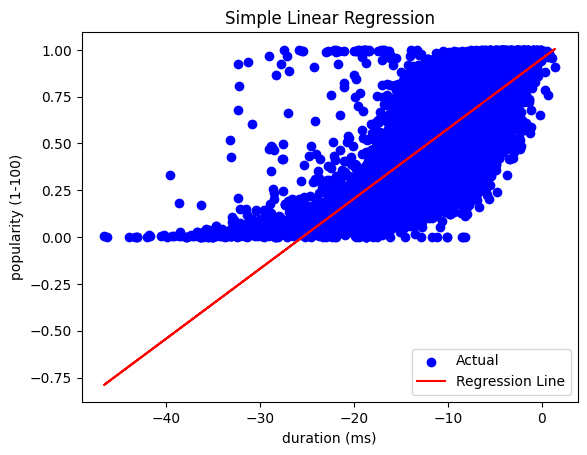

In [194]:
plt.scatter(X_test, y_test, color='blue', label='Actual')


plt.plot(X_test, y_pred, color='red', label='Regression Line')

plt.xlabel('duration (ms)')
plt.ylabel('popularity (1-100)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [195]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

Mean Squared Error: 0.0281321136442039
R-squared score: 0.5784692008825156


In [115]:
X_mult = df[["loudness", "duration_ms"]]
Y_mult = Y

In [116]:
model_mult = LinearRegression()

In [117]:
model.fit(X_mult, Y_mult)

ValueError: Found input variables with inconsistent numbers of samples: [114000, 50]

In [74]:
X1_grid, X2_grid = np.meshgrid(X1, X2)

y_pred_mult = model_mult.intercept_ + model_mult.coef_[0] * X1_grid + model_mult.coef_[1] * X2_grid

MemoryError: Unable to allocate 96.8 GiB for an array with shape (114000, 114000) and data type float64

In [55]:
print(df["duration_ms"]/(1000*60))

0         3.844433
1         2.493500
2         3.513767
3         3.365550
4         3.314217
            ...   
113995    6.416650
113996    6.416667
113997    4.524433
113998    4.731550
113999    4.030433
Name: duration_ms, Length: 114000, dtype: float64


converting ms to min"sec'

In [60]:
def convert_ms_to_min_sec(millis):
    seconds = millis // 1000
    minutes = seconds // 60
    remaning_seconds = round((seconds % 60), 2)
    return minutes, remaning_seconds

print(convert_ms_to_min_sec(df["duration_ms"]))

(0         3
1         2
2         3
3         3
4         3
         ..
113995    6
113996    6
113997    4
113998    4
113999    4
Name: duration_ms, Length: 114000, dtype: int64, 0         50
1         29
2         30
3         21
4         18
          ..
113995    24
113996    25
113997    31
113998    43
113999     1
Name: duration_ms, Length: 114000, dtype: int64)
